# INCOME LEVEL PREDICTION USING CLASSIFICATION ALGORITHM

###### 1: Libraries Installation.
This step sees the installation of needful Libraries such as tensorflow required for this experiment.

In [71]:
#!pip install tensorflow
#!pip install pandas
#!pip install numpy
#!pip install seaborn
#!pip install sklearn
#!pip install imblearn
#!pip install Ipython

In [72]:
#!pip list

###### 2. Import Lbraries

In [73]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Binarizer
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,f1_score
# from tensorflow import keras
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

######  3:  Dataset Importation
This steps loads csv file named "income_evaluation" with pandas

In [74]:
df = pd.read_csv("income_evaluation.csv")

###### 4: Exploratory Data Analysis
This steps sees quick description and understanding of the dataset used for the exercise.

###### 4.1. Dataset Overview

###### 4.1.1.

In [75]:
df.head() 

#This instructs python to show top 5 rows of the dataset.

,id,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


###### 4.1.2.

In [76]:
df.info()

#This instructs python to print out datatypes of the existing columns in my dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              32561 non-null  int64 
 1   age             32561 non-null  int64 
 2   workclass       32561 non-null  object
 3   fnlwgt          32561 non-null  int64 
 4   education       32561 non-null  object
 5   education-num   32561 non-null  int64 
 6   marital-status  32561 non-null  object
 7   occupation      32561 non-null  object
 8   relationship    32561 non-null  object
 9   race            32561 non-null  object
 10  sex             32561 non-null  object
 11  capital-gain    32561 non-null  int64 
 12  capital-loss    32561 non-null  int64 
 13  hours-per-week  32561 non-null  int64 
 14  native-country  32561 non-null  object
 15  income          32561 non-null  object
dtypes: int64(7), object(9)
memory usage: 4.0+ MB


###### 4.1.3.

In [77]:
df.columns

#This instructs Python to show all the column titles in the table

Index(['id', 'age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

###### 4.1.4.

In [78]:
df.shape

#This instructs python to print the number of observations and features of the dataset

(32561, 16)

###### 4.1.5.

In [79]:
df.isnull().sum()

#This instructs python to investigate null values in my dataset

id                0
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

###### 4.2.  Data Cleaning

###### 4.2.1 Droping unimportant features

In [80]:
df.drop(['id', 'education'], inplace = True, axis = 1)

#This instructs python to drop the unimportant columns.
#The column " education" deleted because it serves same purpose as " education-num"

In [81]:
df

#This instructs python to print the first and last 5 rows odf the dataset.

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


###### 4.2.2. Renaming the columns

In [82]:
names = ['Age', 'Workclass', 'Final Weight', 'Education Number', 'Marital Status', 'Occupation', 'Relationship',
             'Race', 'Sex', 'Capital Gain', 'Capital Loss', 'Hours Per Week', 'Native Country', 'Income']
df.columns = names

#This instructs python to rename the columns in the dataframe for better understanding

###### 4.2.3. Confirm  Changes made

In [83]:
df.columns

#This confirms that the changes are succesfully carried out

Index(['Age', 'Workclass', 'Final Weight', 'Education Number',
       'Marital Status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital Gain', 'Capital Loss', 'Hours Per Week', 'Native Country',
       'Income'],
      dtype='object')

###### 4.2.4 Convert Target Variable Classification Into Binary Values

In [84]:
df.loc[(df["Income"] == ' <=50K'),'Income']= 0
df.loc[(df["Income"] == ' >50K'),'Income']= 1
df["Income"] = df["Income"].astype(int)


#This instructs python to covert Income feature into binary values (<=50k is 0, >50k is 1)

In [85]:
df.head(5)


#Confirm the changes have been made

,Age,Workclass,Final Weight,Education Number,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours Per Week,Native Country,Income
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [86]:
df.dtypes

#This instrcuts python to print the datatypes of the dataset features.

Age                  int64
Workclass           object
Final Weight         int64
Education Number     int64
Marital Status      object
Occupation          object
Relationship        object
Race                object
Sex                 object
Capital Gain         int64
Capital Loss         int64
Hours Per Week       int64
Native Country      object
Income               int32
dtype: object

###### 4.3.0. Exploring the Numerical and Categorical features of the dataset

In [87]:
num_data = df.select_dtypes(include='number')  


#This instructs python to identify numerical features as num_data 

In [88]:
cat_data = df.select_dtypes(include='object')


#This instructs python to identify categorical features as num_data 

###### 4.3.1. Quick Overview of Numerical Features in My Dataset

In [89]:
num_data.columns


#This instructs python to print column headers for numerical data

Index(['Age', 'Final Weight', 'Education Number', 'Capital Gain',
       'Capital Loss', 'Hours Per Week', 'Income'],
      dtype='object')

###### 4.3.2. Investigating the Null Values present in the Numerica Features

In [90]:
num_data.isnull().sum()

Age                 0
Final Weight        0
Education Number    0
Capital Gain        0
Capital Loss        0
Hours Per Week      0
Income              0
dtype: int64

###### 5.0. Data Visualization

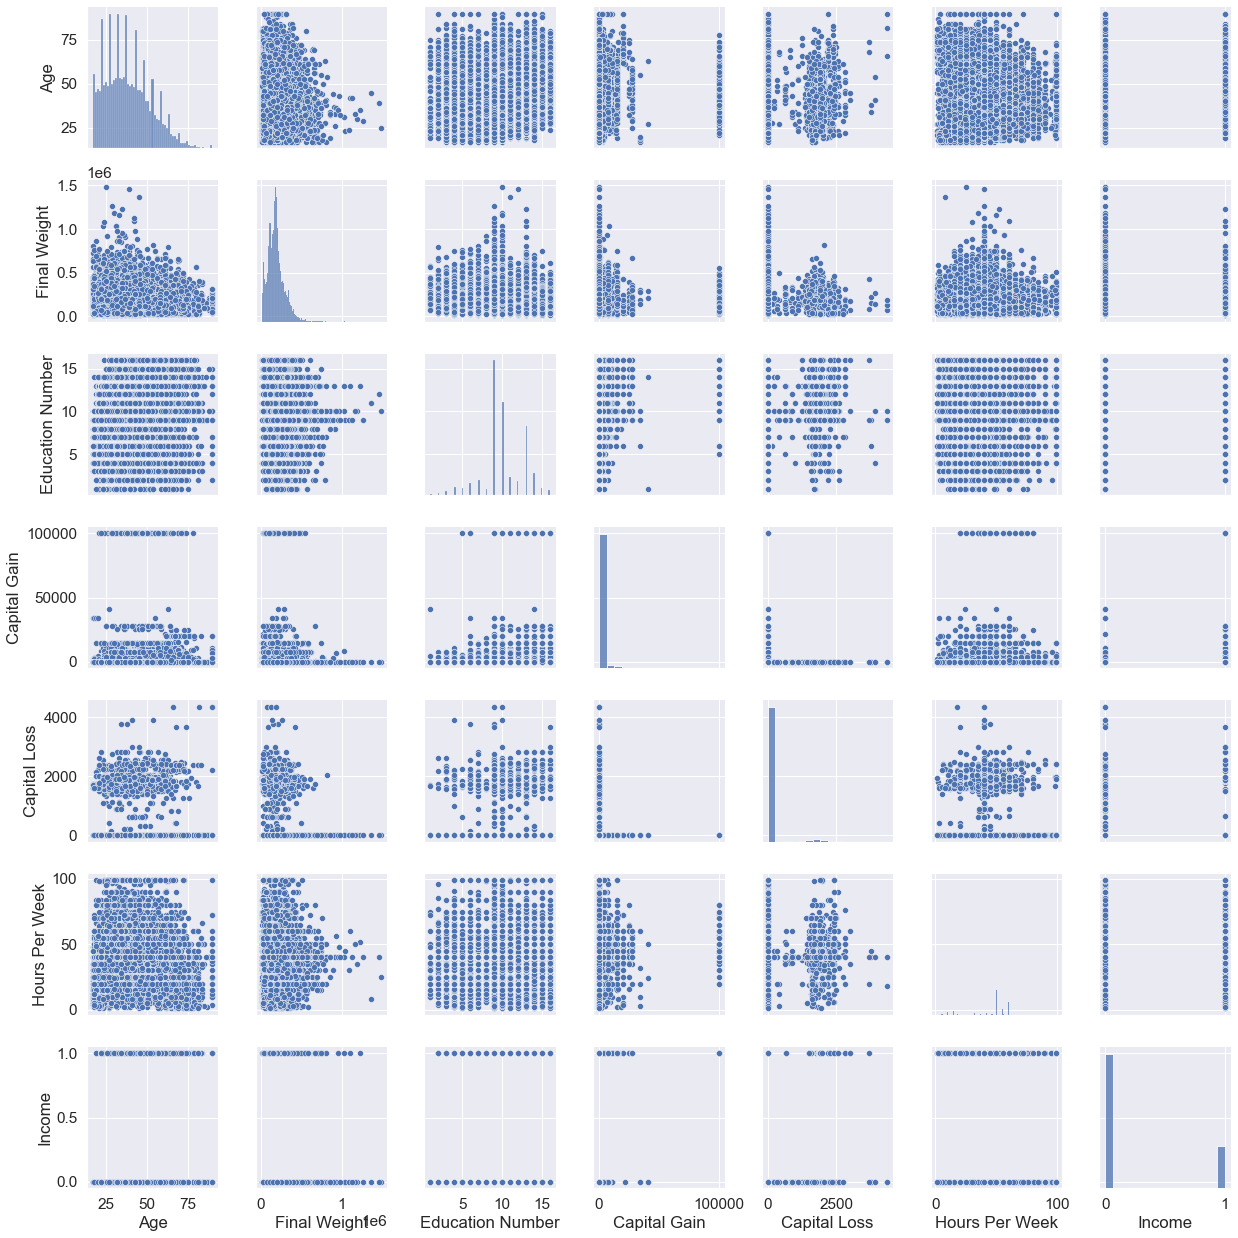

In [91]:
sns.pairplot(num_data)
plt.tight_layout()
plt.show()


#This instrcuts python to pairplot all the numerical features

###### 5.1.0. Quick Overview of the Numerical Dataset

In [92]:
num_data.head(5)

,Age,Final Weight,Education Number,Capital Gain,Capital Loss,Hours Per Week,Income
0,39,77516,13,2174,0,40,0
1,50,83311,13,0,0,13,0
2,38,215646,9,0,0,40,0
3,53,234721,7,0,0,40,0
4,28,338409,13,0,0,40,0


###### 3.6.1. Data distribution across the numerical features and target variable

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Final Weight'}>,
        <AxesSubplot:title={'center':'Education Number'}>],
       [<AxesSubplot:title={'center':'Capital Gain'}>,
        <AxesSubplot:title={'center':'Capital Loss'}>,
        <AxesSubplot:title={'center':'Hours Per Week'}>],
       [<AxesSubplot:title={'center':'Income'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

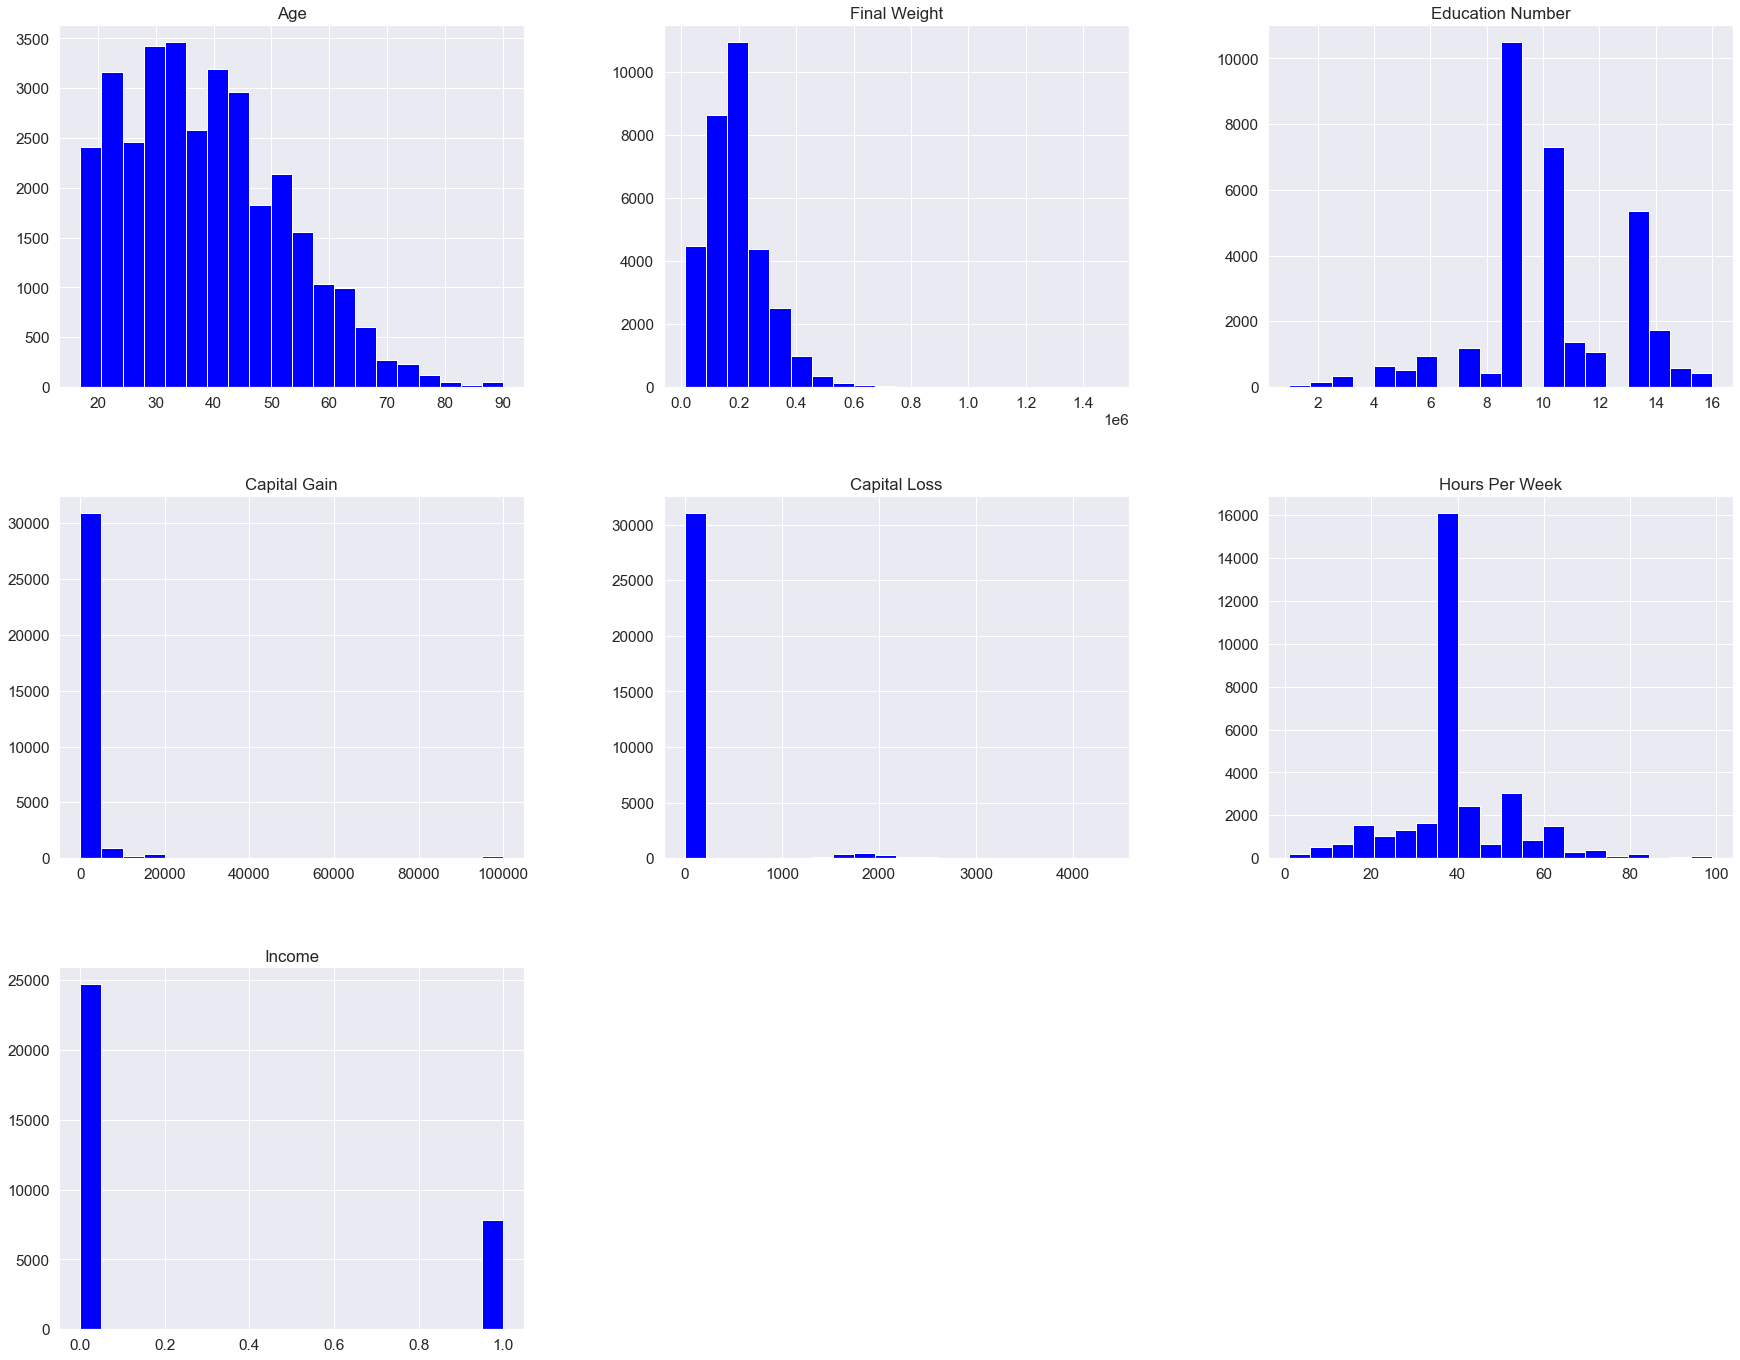

In [93]:
num_data.hist(figsize=(30,24), bins = 20, color = "blue")
plt.show()

###### 3.6.2 Statistical Analysis of the Numerical Features.

In [94]:
num_data.describe()

,Age,Final Weight,Education Number,Capital Gain,Capital Loss,Hours Per Week,Income
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456,0.240810
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429,0.427581
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


###### 3.6.3 Identifying outliers using box plot chart

<Figure size 1080x432 with 0 Axes>

Text(0.5, 1.0, 'The boxcharts for the age and Hours per Week columns')

<AxesSubplot:title={'center':'The boxcharts for the age and Hours per Week columns'}>

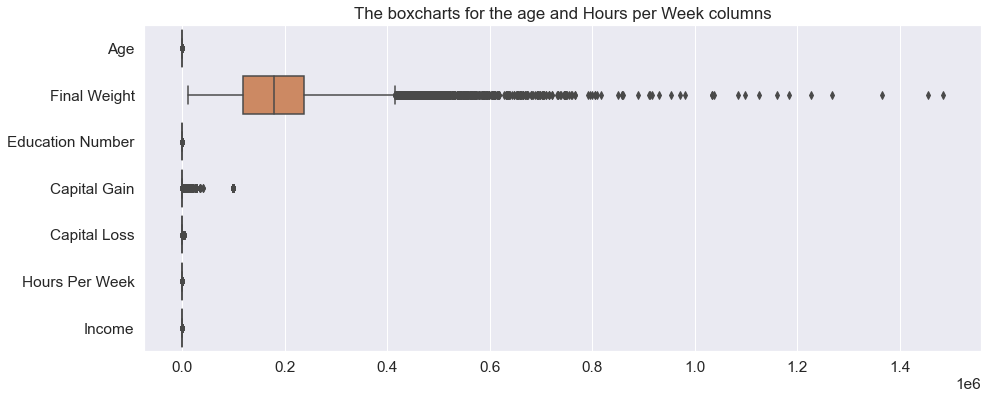

In [95]:
plt.figure(figsize=(15,6))
plt.title(f'The boxcharts for the age and Hours per Week columns')
sns.boxplot( data=df[['Age', 'Final Weight', 'Education Number', 'Sex', 'Capital Gain',
       'Capital Loss', 'Hours Per Week','Income']], orient='h')
plt.show()

###### Correlation Matrix

<AxesSubplot:>

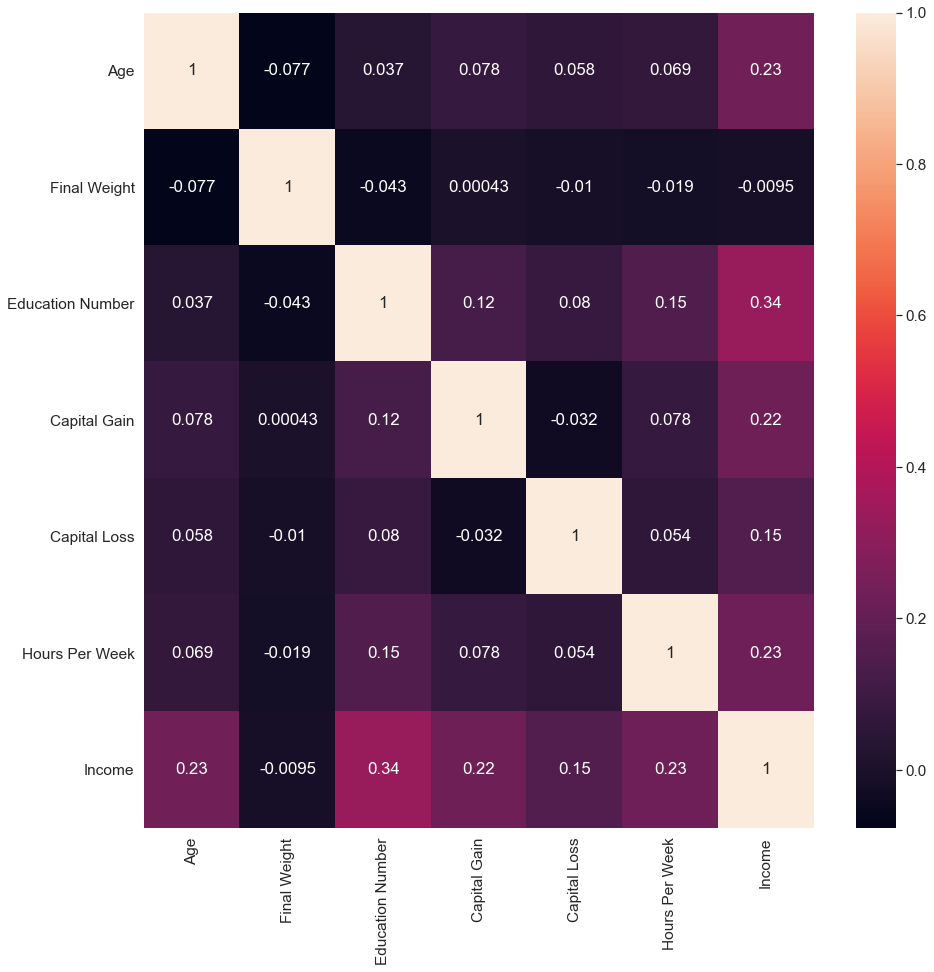

In [96]:
fig= plt.figure(figsize=(15,15))
corr_matrix = num_data.corr()
sns.heatmap(data=corr_matrix,annot=True)
plt.show()

###### 3.6.4 Removing the Outliers

In [97]:
Q1 = np.percentile(df['Final Weight'], 25,
                   method = 'midpoint')
 
Q3 = np.percentile(df['Final Weight'], 75,
                   method = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", df)

Old Shape:         Age          Workclass  Final Weight  Education Number  \
0       39          State-gov         77516                13   
1       50   Self-emp-not-inc         83311                13   
2       38            Private        215646                 9   
3       53            Private        234721                 7   
4       28            Private        338409                13   
...    ...                ...           ...               ...   
32556   27            Private        257302                12   
32557   40            Private        154374                 9   
32558   58            Private        151910                 9   
32559   22            Private        201490                 9   
32560   52       Self-emp-inc        287927                 9   

            Marital Status          Occupation    Relationship    Race  \
0            Never-married        Adm-clerical   Not-in-family   White   
1       Married-civ-spouse     Exec-managerial         Husb

In [98]:
# Upper bound
upper = np.where(df['Final Weight'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df['Final Weight'] <= (Q1-1.5*IQR))
 
''' Removing the Outliers '''
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)
 
print("New Shape: ", df.shape)

' Removing the Outliers '

New Shape:  (31569, 14)


In [99]:
#Size of dataframe now reduced after outliers are removed

<Figure size 1080x432 with 0 Axes>

Text(0.5, 1.0, 'The boxcharts for the age and hours-per-week columns')

<AxesSubplot:title={'center':'The boxcharts for the age and hours-per-week columns'}>

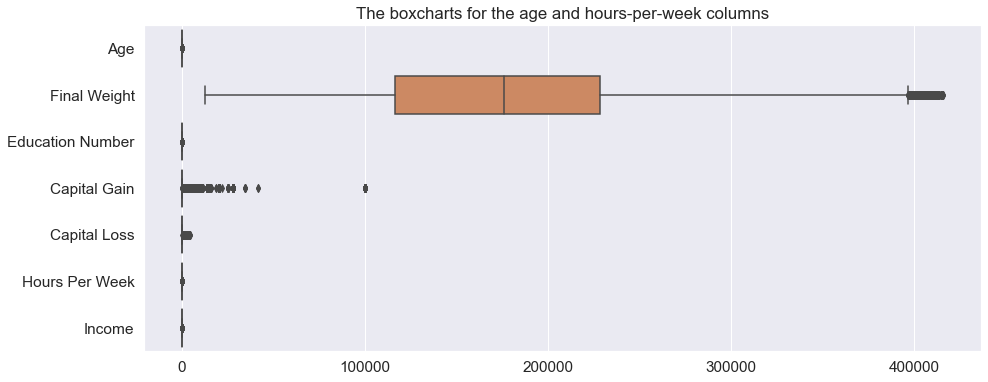

In [100]:
plt.figure(figsize=(15,6))
plt.title(f'The boxcharts for the age and hours-per-week columns')
sns.boxplot( data=df[['Age', 'Final Weight', 'Education Number', 'Sex', 'Capital Gain',
       'Capital Loss', 'Hours Per Week','Income']], orient='h')
plt.show()

In [101]:
#df[df['Capital Gain'] >99000] 

###### 3.3.2. Quick overview of Categorical Features in my dataset

In [102]:
#This instructs python to print the headers for categorical data
cat_data.columns

Index(['Workclass', 'Marital Status', 'Occupation', 'Relationship', 'Race',
       'Sex', 'Native Country'],
      dtype='object')

In [103]:
cat_data.head(5)

,Workclass,Marital Status,Occupation,Relationship,Race,Sex,Native Country
0,State-gov,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba


###### 3.3.3. Examining attributes of each categorical feacture for NaN values?

In [104]:
df['Workclass'].value_counts()

#This instructs python to print the count of each categorical value under 'Workclass'

 Private             21965
 Self-emp-not-inc     2491
 Local-gov            2046
 ?                    1780
 State-gov            1252
 Self-emp-inc         1095
 Federal-gov           920
 Without-pay            14
 Never-worked            6
Name: Workclass, dtype: int64

In [105]:
#This instructs python to print the count of each categorical value under 'Marital Status'
df['Marital Status'].value_counts()

 Married-civ-spouse       14552
 Never-married            10302
 Divorced                  4324
 Separated                  986
 Widowed                    978
 Married-spouse-absent      406
 Married-AF-spouse           21
Name: Marital Status, dtype: int64

In [106]:
#This instructs python to print the count of each categorical value under 'Occupation'
df['Occupation'].value_counts()

 Prof-specialty       4038
 Craft-repair         3969
 Exec-managerial      3953
 Adm-clerical         3665
 Sales                3539
 Other-service        3186
 Machine-op-inspct    1947
 ?                    1786
 Transport-moving     1544
 Handlers-cleaners    1303
 Farming-fishing       960
 Tech-support          896
 Protective-serv       629
 Priv-house-serv       145
 Armed-Forces            9
Name: Occupation, dtype: int64

In [107]:
#This instructs python to print the count of each categorical value under 'Relationship'
df['Relationship'].value_counts()

 Husband           12817
 Not-in-family      8047
 Own-child          4905
 Unmarried          3332
 Wife               1529
 Other-relative      939
Name: Relationship, dtype: int64

In [108]:
#This instructs python to print the count of each categorical value under 'Race'
df['Race'].value_counts()

 White                 27044
 Black                  2913
 Asian-Pac-Islander     1035
 Amer-Indian-Eskimo      310
 Other                   267
Name: Race, dtype: int64

In [109]:
#This instructs python to print the count of each categorical value under 'Sex'
df['Sex'].value_counts()

 Male      21068
 Female    10501
Name: Sex, dtype: int64

In [110]:
#This instructs python to print the count of each categorical value under 'Native Country'
df['Native Country'].value_counts()

 United-States                 28350
 ?                               567
 Mexico                          549
 Philippines                     197
 Germany                         134
 Canada                          118
 Puerto-Rico                     111
 India                           100
 Cuba                             94
 El-Salvador                      93
 England                          88
 Jamaica                          81
 South                            80
 China                            75
 Italy                            71
 Dominican-Republic               70
 Vietnam                          67
 Poland                           60
 Japan                            59
 Columbia                         57
 Guatemala                        52
 Taiwan                           50
 Haiti                            44
 Iran                             42
 Portugal                         37
 Greece                           29
 Nicaragua                        29
 

In [111]:
#This instructs python to print the count of each categorical value under 'Income'
df['Income'].value_counts()

0    23937
1     7632
Name: Income, dtype: int64

###### 3.3.4. We found missing values in a few of the categorical features. To deal with this; First, I converted the " ?" to Null Values

In [112]:
df.replace('?',np.NaN, inplace = True)

In [113]:
df.isna().sum()

Age                 0
Workclass           0
Final Weight        0
Education Number    0
Marital Status      0
Occupation          0
Relationship        0
Race                0
Sex                 0
Capital Gain        0
Capital Loss        0
Hours Per Week      0
Native Country      0
Income              0
dtype: int64

###### 3.5. Replace the Null Values with mode - most frequent values in each column.

In [114]:
non_numeric = ['Workclass','Occupation','Native Country']
df[non_numeric]=df[non_numeric].fillna(df.mode().iloc[0])

#This instructs python to replace the NaN values with mode value in each column

In [115]:
print("Number of missing Values in: ")
for ColName in df[['Age', 'Workclass', 'Final Weight', 'Education Number',
       'Marital Status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital Gain', 'Capital Loss', 'Hours Per Week', 'Native Country',
       'Income']]:
    print("{} = {}".format(ColName, df[ColName].isnull().sum()))

Number of missing Values in: 
Age = 0
Workclass = 0
Final Weight = 0
Education Number = 0
Marital Status = 0
Occupation = 0
Relationship = 0
Race = 0
Sex = 0
Capital Gain = 0
Capital Loss = 0
Hours Per Week = 0
Native Country = 0
Income = 0


###### Frequency distribution of the target variable; Income

In [116]:
Income = df.Income.value_counts()

<Figure size 1080x540 with 0 Axes>

([<matplotlib.patches.Wedge at 0x228cab1f1f0>,
 [Text(-0.7976989361603528, 0.7574142903646864, '23937'),
  Text(0.8702170599463349, -0.8262700942054947, '7632')])

Text(0.5, 1.0, 'Income distribution')

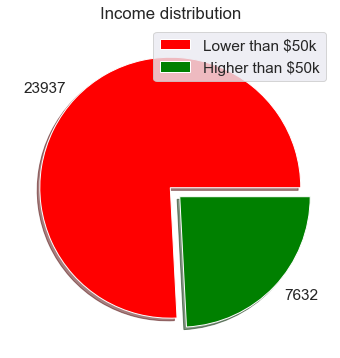

In [117]:
plt.figure(figsize=(15,7.5))
colors = ['Red', 'Green']
explode = [0, 0.1]
plt.pie(Income, labels=Income.values, colors=colors, explode = explode, shadow=True)
plt.title('Income distribution')
plt.legend(['Lower than $50k','Higher than $50k'])
fig = plt.gcf() 
fig.set_size_inches (6,6)
plt.show()

###### Workclass-Income frequency distribution

<Figure size 1080x432 with 0 Axes>

<AxesSubplot:xlabel='Workclass', ylabel='count'>

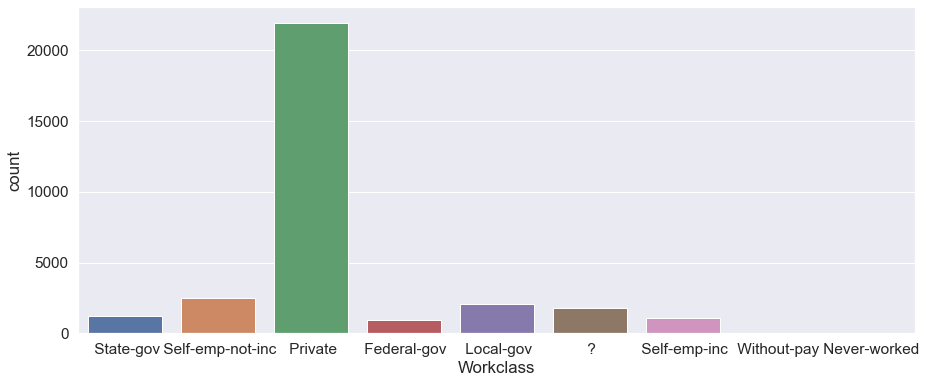

In [118]:
sns.set_theme(style="ticks")
sns.set(font_scale=1.4)
plt.figure(figsize=(15,6))
sns.countplot(data = df, x = df['Workclass'])

<Figure size 1080x432 with 0 Axes>

Text(0.5, 1.0, 'Frequency distribution of workclass variable with income')

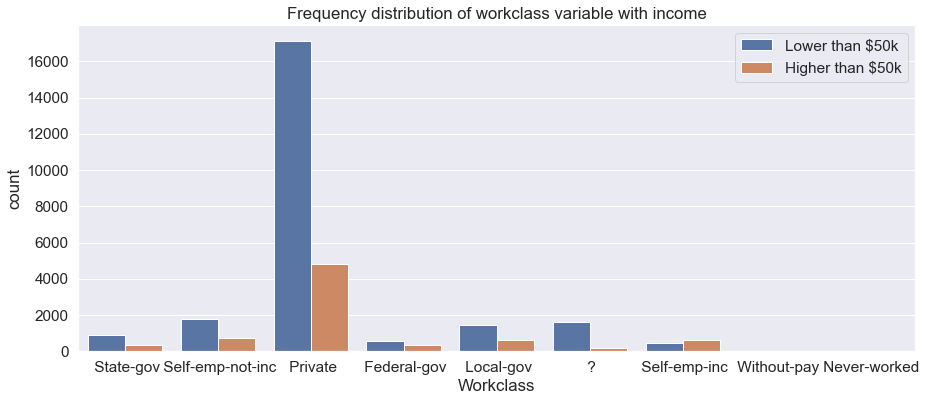

In [119]:
plt.figure(figsize=(15,6))
x5=sns.countplot(x="Workclass", hue="Income",data=df)
x5.set_title("Frequency distribution of workclass variable with income")
x5.legend(['Lower than $50k','Higher than $50k'],loc="upper right")
plt.show()

###### Visualization: Marital Status frequency distribution and relationship with Income

<Figure size 1080x432 with 0 Axes>

<AxesSubplot:title={'center':'Marital_Status'}>

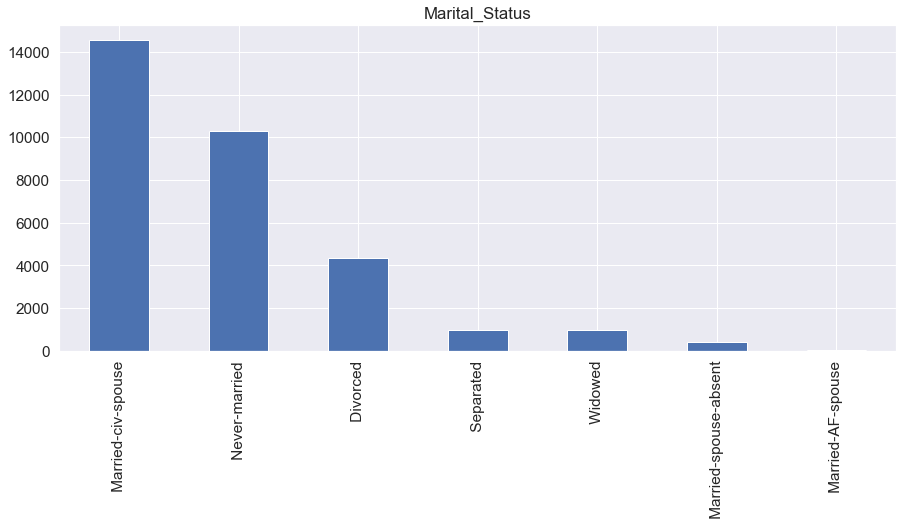

In [120]:
plt.figure(figsize=(15,6))

df['Marital Status'].value_counts().plot(kind='bar', title = 'Marital_Status')

<Figure size 1080x432 with 0 Axes>

Text(0.5, 1.0, 'Frequency distribution of Marital Status variable against income')

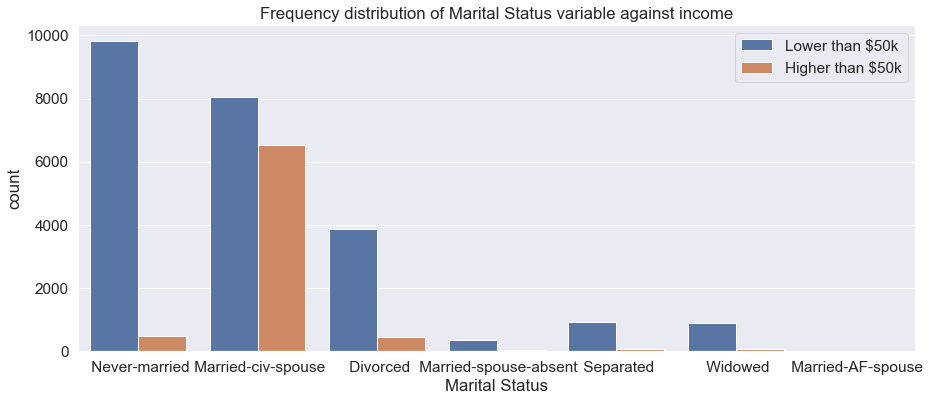

In [121]:
plt.figure(figsize=(15,6))
x5=sns.countplot(x="Marital Status", hue="Income",data=df)
x5.set_title("Frequency distribution of Marital Status variable against income")
x5.legend(['Lower than $50k','Higher than $50k'],loc="upper right")
plt.show()

###### Visualization:  'Relationship' frequency distribution and its relationship with Income

([<matplotlib.patches.Wedge at 0x228caec4520>,
 [Text(0.640282403144585, 2.1047656506659824, ' Not-in-family'),
  Text(-2.151587236106628, -0.4589905940463727, ' Husband'),
  Text(-0.1576058622134083, -2.1943473727274743, ' Wife'),
  Text(1.4963918041202227, -1.6127031867525488, ' Own-child'),
  Text(2.074757924656411, -0.7316963537393247, ' Unmarried'),
  Text(2.1904019261299608, -0.20527883964539406, ' Other-relative')])

 Husband           12817
 Not-in-family      8047
 Own-child          4905
 Unmarried          3332
 Wife               1529
 Other-relative      939
Name: Relationship, dtype: int64


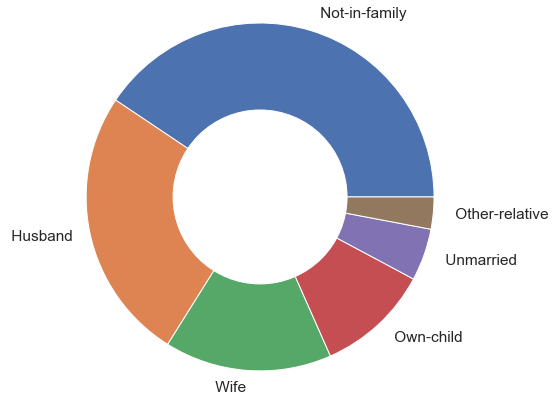

In [122]:
values = df['Relationship'].value_counts()
labels = df['Relationship'].unique().tolist()
plt.pie(values, labels = labels, radius = 2)
my_circle = plt.Circle((0,0),1,color='white')###### Visualization: Marital Status frequency distribution and relationship with Income
p=plt.gcf()
p.gca().add_artist(my_circle)
print(values)

<Figure size 1080x432 with 0 Axes>

Text(0.5, 1.0, 'Frequency distribution of Relationship variable against Income')

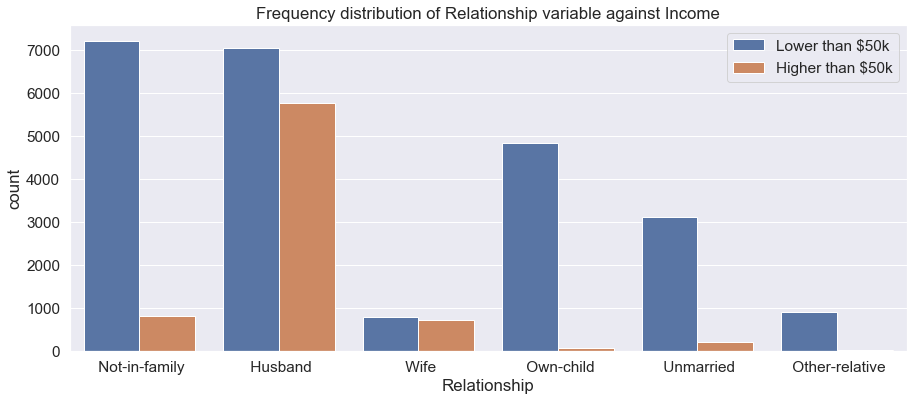

In [123]:
plt.figure(figsize=(15,6))
x5=sns.countplot(x="Relationship", hue="Income",data=df)
x5.set_title("Frequency distribution of Relationship variable against Income")
x5.legend(['Lower than $50k','Higher than $50k'],loc="upper right")
plt.show()

###### Visualization:  Race frequency distribution and relationship with Income

In [124]:
import plotly.graph_objects as go
values = df['Race'].value_counts()
labels = df['Race'].unique().tolist()
fig = go.Figure(data=[go.Pie(values=values, labels = labels, title = 'Race')])

fig.show()
print(values)

 White                 27044
 Black                  2913
 Asian-Pac-Islander     1035
 Amer-Indian-Eskimo      310
 Other                   267
Name: Race, dtype: int64


<Figure size 1080x432 with 0 Axes>

Text(0.5, 1.0, 'Frequency distribution of Race variable against Income')

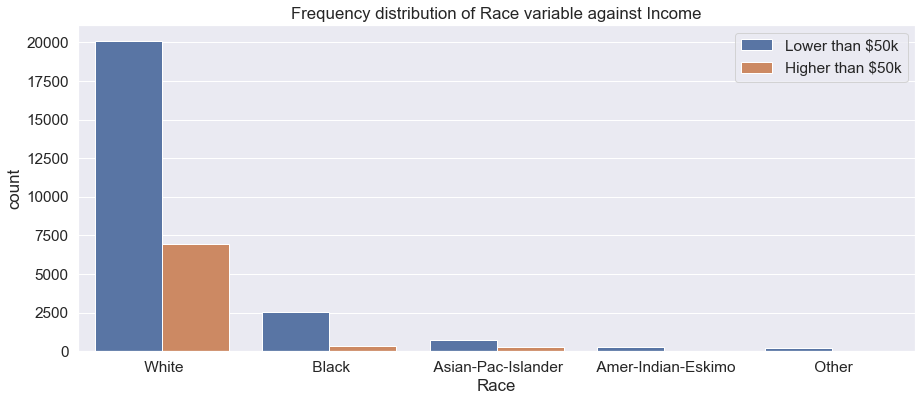

In [125]:
plt.figure(figsize=(15,6))
x5=sns.countplot(x="Race", hue="Income",data=df)
x5.set_title("Frequency distribution of Race variable against Income")
x5.legend(['Lower than $50k','Higher than $50k'],loc="upper right")
plt.show()

###### Visualization:  Sex frequency distribution and relationship with Income

<Figure size 720x432 with 0 Axes>

<AxesSubplot:xlabel='Sex', ylabel='count'>

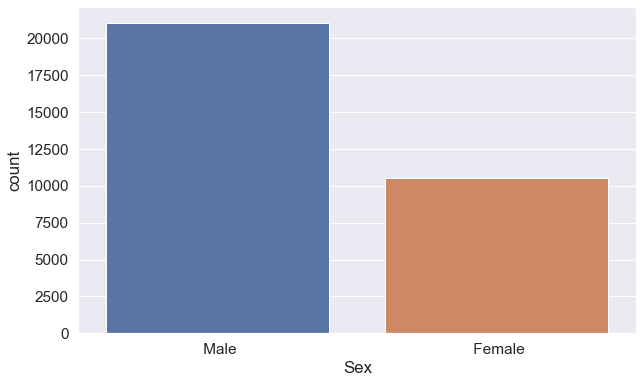

In [126]:
sns.set_theme(style="ticks")
sns.set(font_scale=1.4)
plt.figure(figsize=(10,6))
sns.countplot(data = df, x = df['Sex'])

<Figure size 1080x432 with 0 Axes>

Text(0.5, 1.0, 'Frequency distribution of Sex variable against Income')

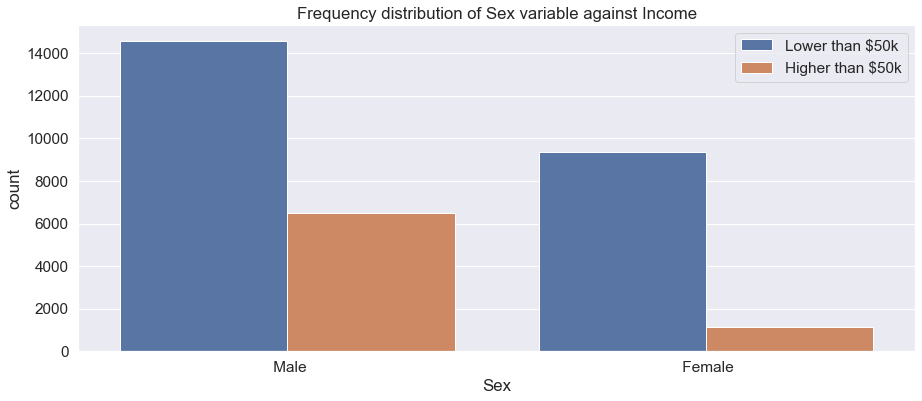

In [127]:
plt.figure(figsize=(15,6))
x5=sns.countplot(x="Sex", hue="Income",data=df)
x5.set_title("Frequency distribution of Sex variable against Income")
x5.legend(['Lower than $50k','Higher than $50k'],loc="upper right")
plt.show()

###### Visualization:  Native Country frequency distribution and relationship with Income

<Figure size 720x576 with 0 Axes>

<AxesSubplot:title={'center':'Native Country'}>

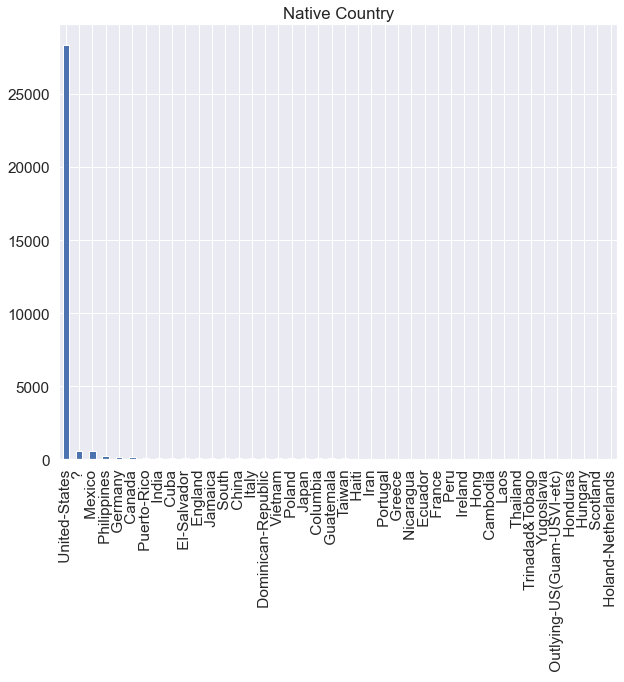

In [128]:
plt.figure(figsize=(10,8))

df['Native Country'].value_counts().plot(kind='bar', title = 'Native Country')

###### Encoding categorical features

In [129]:
from sklearn.preprocessing import LabelEncoder

In [130]:
#Creating instance of label encoder
Le = LabelEncoder()

In [131]:
#Converting Categorical Columns to numeric using Label Encoding and changing the dtype to categorical
category_columns = ['Workclass','Marital Status','Occupation','Relationship','Race','Sex','Native Country']
for col in category_columns:
    df[col] = Le.fit_transform(df[col])
    df[col] = df[col].astype('category')
df.head()

,Age,Workclass,Final Weight,Education Number,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours Per Week,Native Country,Income
0,39,7,77516,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,13,2,10,5,2,0,0,0,40,5,0


In [132]:
df.dtypes

Age                    int64
Workclass           category
Final Weight           int64
Education Number       int64
Marital Status      category
Occupation          category
Relationship        category
Race                category
Sex                 category
Capital Gain           int64
Capital Loss           int64
Hours Per Week         int64
Native Country      category
Income                 int32
dtype: object

In [133]:
#We have successfully Encoded our data and set the datatype to category

In [134]:
df.Income.value_counts()

0    23937
1     7632
Name: Income, dtype: int64

In [135]:
# It is observed that we have an imbalance in our target class, which will be dealt with later.

### Feature Selection

#### Dropping the target column from the dataset to form the input vector

In [136]:
X = df.drop('Income',axis=1)
X.head()

,Age,Workclass,Final Weight,Education Number,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours Per Week,Native Country
0,39,7,77516,13,4,1,1,4,1,2174,0,40,39
1,50,6,83311,13,2,4,0,4,1,0,0,13,39
2,38,4,215646,9,0,6,1,4,1,0,0,40,39
3,53,4,234721,7,2,6,0,2,1,0,0,40,39
4,28,4,338409,13,2,10,5,2,0,0,0,40,5


#### Treating the "Income" attribute as the output

In [137]:
y = df.Income
y[:5]

0    0
1    0
2    0
3    0
4    0
Name: Income, dtype: int32

#### Splitting the data into Train and Test set

In [138]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1,stratify=y)

In [139]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((25255, 13), (6314, 13), (25255,), (6314,))

#### Dealing with the imbalanced data

In [140]:
smote = SMOTE(random_state=1)

In [141]:
# We apply the smote function only on our training set. 
X_train,y_train = smote.fit_resample(X_train,y_train)

In [142]:
X_train.shape,y_train.shape

((38298, 13), (38298,))

#### Observations:
#### (i). It is observed that, the smote function has created samples of the minority class to match up with the number of samples 
#### we have in the Majority Class. 
#### (ii). This process solves the data imbalance issue we have in our dataset ####

In [143]:
# For model improvement, it is better for us to scale our data. 
# Let's do that

In [144]:
# Creating an object of the class StandardScaler
scaler = StandardScaler()

In [145]:
# Apply fit_transform only on the X_train and transform on the X_test. 
# The reason we aapply the transform function on the X_test alone is because we do not want the model to learn from our 
# Test set
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [146]:
# Our X_train, X_test, y_train, y_test are ready. 

### Model Selection and Training

### 1.   SVC

#### Creating an object of our SVC Model, the parameters are chosen at random
#### If accuracy is low, we will tune the model to get the best parameters

In [147]:
model = SVC(gamma='auto',kernel='rbf',C=1)

#### Training the model 

In [148]:
model.fit(X_train,y_train)

SVC(C=1, gamma='auto')

#### Checking the Model Accuracy

In [149]:
model.score(X_test,y_test)

0.8093126385809313

###### * Our model gives an accuracy of 80%, fair enough. Therefore, No need to tune our model to get the best parameter.

In [150]:
y_predict = model.predict(X_test)

##### Checking Model's F1 Score

In [151]:
f1_score(y_test,y_predict)

0.664249860568879

<Figure size 864x576 with 0 Axes>

<AxesSubplot:>

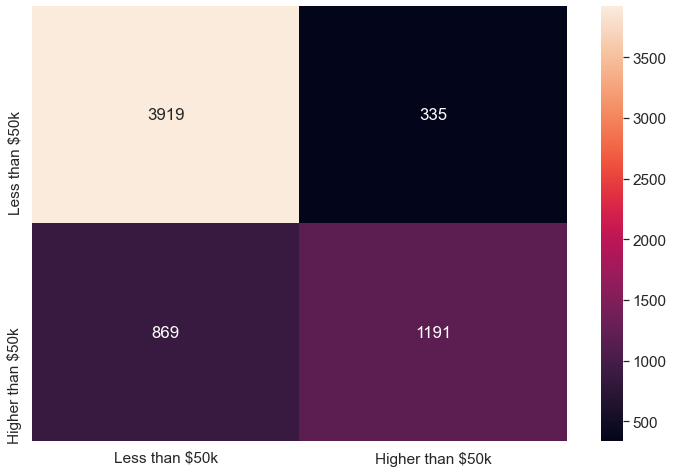

In [152]:
# Consufion Matrics
matrix = confusion_matrix(y_predict,y_test)
matrixdf = pd.DataFrame(matrix,index=['Less than $50k','Higher than $50k'],columns=['Less than $50k','Higher than $50k'])
plt.figure(figsize=(12,8))
sns.heatmap(matrixdf,annot=True,fmt='.5g')

#### SVG Model's Result Summary

In [153]:
modelResultsSVM = ({
    'Model Name': 'SVM',
    'Model Score': model.score(X_test,y_test),
    'Model F1 Score': f1_score(y_test,y_predict)
})

In [154]:
modelResultsSVM

{'Model Name': 'SVM',
 'Model Score': 0.8093126385809313,
 'Model F1 Score': 0.664249860568879}

### 2. RANDOM FOREST CLASSIFIER

In [155]:
model = RandomForestClassifier()

In [156]:
model.fit(X_train,y_train)

RandomForestClassifier()

#### Checking The Model's Score

In [157]:
model.score(X_test,y_test)

0.833861260690529

###### * Our model gives an accuracy of 83%, fair enough. Therefore, No need to tune our model to get the best parameter.

In [158]:
y_predict = model.predict(X_test)

#### Checking The Model's F1 Score

In [159]:
f1_score(y_test,y_predict)

0.6687717082412378

<Figure size 864x576 with 0 Axes>

<AxesSubplot:>

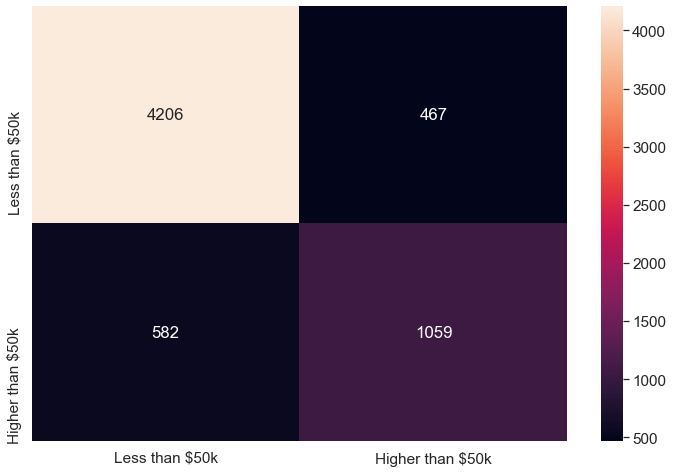

In [160]:
# Consufion Matrics
matrix = confusion_matrix(y_predict,y_test)
matrixdf = pd.DataFrame(matrix,index=['Less than $50k','Higher than $50k'],columns=['Less than $50k','Higher than $50k'])
plt.figure(figsize=(12,8))
sns.heatmap(matrixdf,annot=True,fmt='.5g')

#### Random Forest's Model Summary Result

In [161]:
modelResultsRF = ({
    'Model Name': 'Random Forest',
    'Model Score': model.score(X_test,y_test),
    'Model F1 Score': f1_score(y_test,y_predict)
})

### 3. Logistic Regression

In [162]:
model = LogisticRegression()

In [163]:
model.fit(X_train,y_train)

LogisticRegression()

#### Logistic Regression Model Score

In [164]:
model.score(X_test,y_test)

0.7553056699398163

###### * Our model gives an accuracy of 75%, fair enough. Therefore, No need to tune our model to get the best parameter.

In [165]:
y_predict = model.predict(X_test)

#### Logistic Regression Model F1 Score

In [166]:
f1_score(y_test,y_predict)

0.5985970381917382

<Figure size 864x576 with 0 Axes>

<AxesSubplot:>

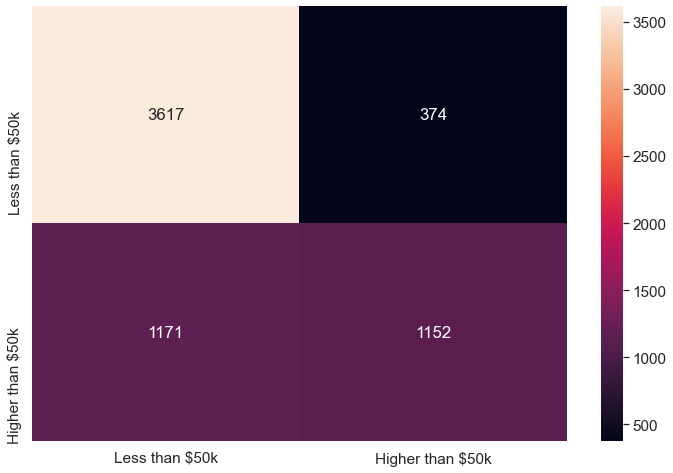

In [167]:
# Consufion Matrics
matrix = confusion_matrix(y_predict,y_test)
matrixdf = pd.DataFrame(matrix,index=['Less than $50k','Higher than $50k'],columns=['Less than $50k','Higher than $50k'])
plt.figure(figsize=(12,8))
sns.heatmap(matrixdf,annot=True,fmt='.5g')

#### Result Summary: Logistic Regression Model

In [168]:
modelResultsLR = ({
    'Model Name': 'Logistic Regression',
    'Model Score': model.score(X_test,y_test),
    'Model F1 Score': f1_score(y_test,y_predict)
})

In [169]:
modelResultsLR

{'Model Name': 'Logistic Regression',
 'Model Score': 0.7553056699398163,
 'Model F1 Score': 0.5985970381917382}

#### Creating a dictionary with all my models

In [170]:
myresults = {
    'Logistic Regression':modelResultsLR,
    'Random Forest Classifier': modelResultsRF,
    'SVC': modelResultsSVM
}

In [171]:
myresults

{'Logistic Regression': {'Model Name': 'Logistic Regression',
  'Model Score': 0.7553056699398163,
  'Model F1 Score': 0.5985970381917382},
 'Random Forest Classifier': {'Model Name': 'Random Forest',
  'Model Score': 0.833861260690529,
  'Model F1 Score': 0.6687717082412378},
 'SVC': {'Model Name': 'SVM',
  'Model Score': 0.8093126385809313,
  'Model F1 Score': 0.664249860568879}}

#### Results Table for the 3 Models

In [172]:
ResultDF = pd.DataFrame(myresults.values(),columns=['Model Name','Model Score', 'Model F1 Score'])
ResultDF.sort_values(by='Model Score',ascending=False, inplace=True)
ResultDF

,Model Name,Model Score,Model F1 Score
1,Random Forest,0.833861,0.668772
2,SVM,0.809313,0.664250
0,Logistic Regression,0.755306,0.598597


#### COMPARATIVE ANALYSIS BY MODEL SCORE

<Figure size 1080x504 with 0 Axes>

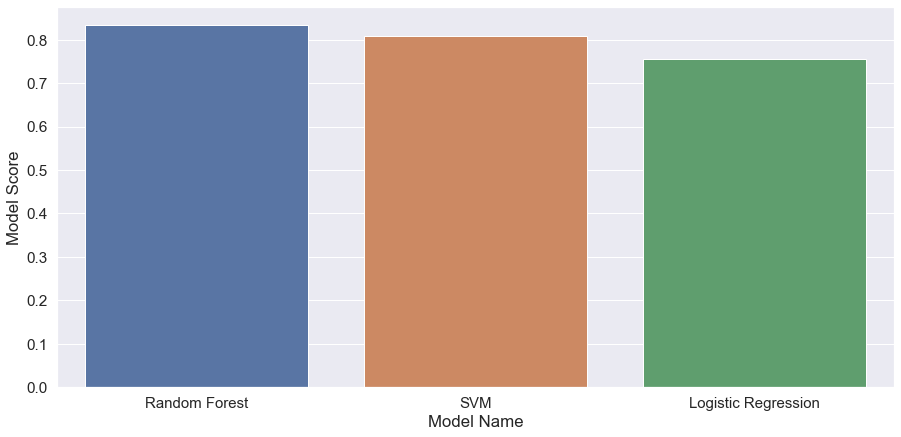

In [174]:
plt.figure(figsize=(15,7))
ax = sns.barplot(x='Model Name',y='Model Score',data=ResultDF)
ax.tick_params(axis='x', which='major', labelsize=15)

#### COMPARATIVE ANALYSIS BY MODEL F1 SCORE

<Figure size 1080x504 with 0 Axes>

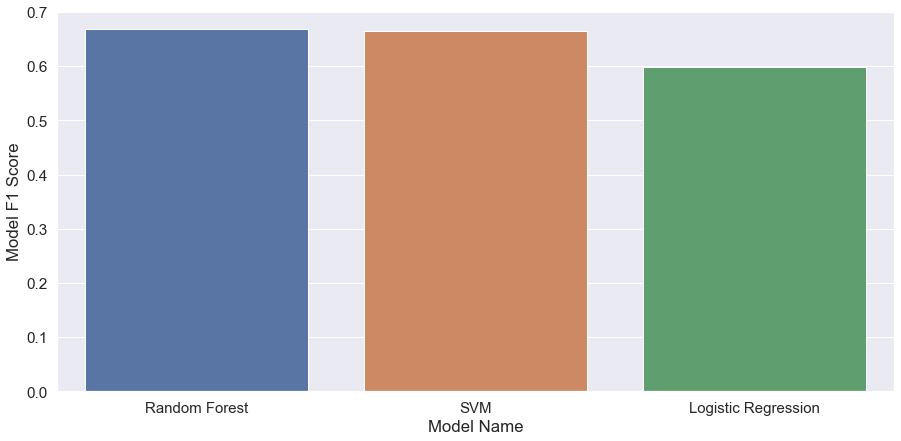

In [175]:
plt.figure(figsize=(15,7))
ax = sns.barplot(x='Model Name',y='Model F1 Score',data=ResultDF)
ax.tick_params(axis='x', which='major', labelsize=15)